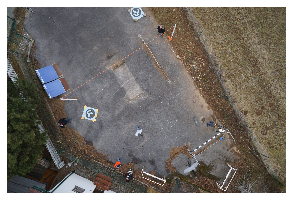

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

rand_seed = 42

datapath = "/home/derekdb/notebooks/uw-geohack-challenge/data"

path = Path(datapath)/'eval_data/'
img_path = path/'images'
lbl_path = path/'label_images'

fnames = get_image_files(img_path)

img = open_image(fnames[0])
img.show(figsize=(5,5))


In [4]:
src_size = np.array(img.shape[1:])
src_size

array([4000, 6000])

In [15]:
src = (SegmentationItemList.from_folder(img_path)).split_none().label_empty()
type(src)

fastai.data_block.LabelLists

In [11]:
size = src_size//4
bs = 1

In [14]:
data = (src.transform(get_transforms(), size=size, tfms=None, tfm_y=False)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

TypeError: transform() got multiple values for argument 'tfms'

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)